<a href="https://colab.research.google.com/github/grw23/PHYS332/blob/main/Exercise_3_2D_Diffusion_Worked_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the diffusion equation in 2D using a finite difference method

For this exercise, first look at the textbook example of 2D diffusion in python here: https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/


In particular, read the first part describing the first three equations, and how the state of the system at time step $n+1$ may be calculated from its state at time step $n$.

In this exercise, consider a square puddle with side lengths of 10 cm which is shallow so that this is a 2D problem. Some contamination - an ionic species of diffusion coefficient $D = 2$ x $10^3\mu$m$^2$ s$^{-1}$ - is dropped into the pool. At time $t=0$ s it has a concentration of 0.1 mol L$^{-1}$ within a circle of radius $r=10$ mm at the centre of the pool. 

In the worked example, all the code (from the three blocks in the problem) is included in one block for each of the conditions required.

Firstly for $dx = 1$ mm.

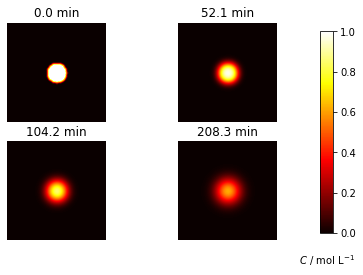

7.88528774940439e-05 0.6251301921201815


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# puddle size in m
# width
w = 0.1
#height
h = 0.1

# length of spatial intervals in x-, y- directions in m
dx = dy = 0.001
# number of spatial intervals in each direction
nx, ny = int(w/dx), int(h/dy)

# Diffusion coefficient for the contaminant, m2.s-1
D = 2e-9

# Initial concentration of the contaminant in mol L-1
C_init = 1

# Define an initial matrix in which there is no contamination, and a copy of that matrix
c0 = np.zeros((nx, ny))
c = c0.copy()

# Initial conditions occur within a circle of radius r centred at (cx,cy) (in m)
r, cx, cy = 0.01, 0.05, 0.05
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            c0[i,j] = C_init

# Define shorthand variables for dx*dx and dy*dy
dx2, dy2 = dx*dx, dy*dy

# Define the scaling of dt using the scaling of dx, dy and D; based on the convection-diffusion equation in the infinitessimal limit.
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

# Number of timesteps for the simulation
nsteps = 101

# Do the calculation with forward-difference in time, central-difference in space

# Notes on syntax for vectors here:
# vec[a:b] means the elements from a to b of the vector vec
# vec[:] means all the elements
# vec[a:] means from element a to the final element
# vec[a:-1] means from element a to the end of the vector, except the last element
# So here c[1:-1, 1:-1] means from the second element (the first one has index zero) to the second to last element for both x and y
# We don't include all the elements because those on the edge cannot use the central-difference formulation (there is no element next to them)
# This is equivalent to having a boundary condition of zero concentration along the edge

def do_timestep(c0, c):
    c[1:-1, 1:-1] = c0[1:-1, 1:-1] + D * dt * (
          (c0[2:, 1:-1] - 2*c0[1:-1, 1:-1] + c0[:-2, 1:-1])/dx2
          + (c0[1:-1, 2:] - 2*c0[1:-1, 1:-1] + c0[1:-1, :-2])/dy2 )

    c0 = c.copy()
    return c0, c

  # Output 4 figures at these timesteps
mfig = [0, 25, 50, 100]

# This variable counts the figures generates
fignum = 0

# This creates a figure
fig = plt.figure()

# This uses the function defined in block 2 to calculate through the timesteps
for m in range(nsteps):
    c0, c = do_timestep(c0, c)

    # This code creates and formats a figure if the step number is one of those specified above
    if m in mfig:
        fignum += 1
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(c.copy(), cmap=plt.get_cmap('hot'), vmin=0,vmax=C_init)
        ax.set_axis_off()
        ax.set_title('{:.1f} min'.format(m*dt/60))

# This code formats and shows the subfigures together
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$C$ / mol L$^{-1}$', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

# Print calculated values at the requested points
print(c[int(nx/4),int(ny/4)], c[int(nx/2),int(ny/2)])


Next for $dx = 0.1$ mm.



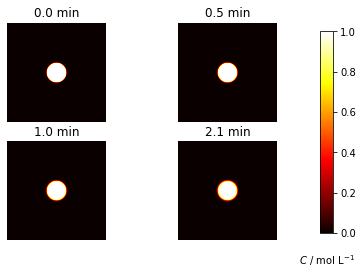

0.0 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# puddle size in m
# width
w = 0.1
#height
h = 0.1

# length of spatial intervals in x-, y- directions in m
dx = dy = 0.0001
# number of spatial intervals in each direction
nx, ny = int(w/dx), int(h/dy)

# Diffusion coefficient for the contaminant, m2.s-1
D = 2e-9

# Initial concentration of the contaminant in mol L-1
C_init = 1

# Define an initial matrix in which there is no contamination, and a copy of that matrix
c0 = np.zeros((nx, ny))
c = c0.copy()

# Initial conditions occur within a circle of radius r centred at (cx,cy) (in m)
r, cx, cy = 0.01, 0.05, 0.05
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            c0[i,j] = C_init

# Define shorthand variables for dx*dx and dy*dy
dx2, dy2 = dx*dx, dy*dy

# Define the scaling of dt using the scaling of dx, dy and D; based on the convection-diffusion equation in the infinitessimal limit.
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

# Number of timesteps for the simulation
nsteps = 101

# Do the calculation with forward-difference in time, central-difference in space

# Notes on syntax for vectors here:
# vec[a:b] means the elements from a to b of the vector vec
# vec[:] means all the elements
# vec[a:] means from element a to the final element
# vec[a:-1] means from element a to the end of the vector, except the last element
# So here c[1:-1, 1:-1] means from the second element (the first one has index zero) to the second to last element for both x and y
# We don't include all the elements because those on the edge cannot use the central-difference formulation (there is no element next to them)
# This is equivalent to having a boundary condition of zero concentration along the edge

def do_timestep(c0, c):
    c[1:-1, 1:-1] = c0[1:-1, 1:-1] + D * dt * (
          (c0[2:, 1:-1] - 2*c0[1:-1, 1:-1] + c0[:-2, 1:-1])/dx2
          + (c0[1:-1, 2:] - 2*c0[1:-1, 1:-1] + c0[1:-1, :-2])/dy2 )

    c0 = c.copy()
    return c0, c

  # Output 4 figures at these timesteps
mfig = [0, 25, 50, 100]

# This variable counts the figures generates
fignum = 0

# This creates a figure
fig = plt.figure()

# This uses the function defined in block 2 to calculate through the timesteps
for m in range(nsteps):
    c0, c = do_timestep(c0, c)

    # This code creates and formats a figure if the step number is one of those specified above
    if m in mfig:
        fignum += 1
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(c.copy(), cmap=plt.get_cmap('hot'), vmin=0,vmax=C_init)
        ax.set_axis_off()
        ax.set_title('{:.1f} min'.format(m*dt/60))

# This code formats and shows the subfigures together
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$C$ / mol L$^{-1}$', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

# Print calculated values at the requested points
print(c[int(nx/4),int(ny/4)], c[int(nx/2),int(ny/2)])

Next for $dx=10$ mm

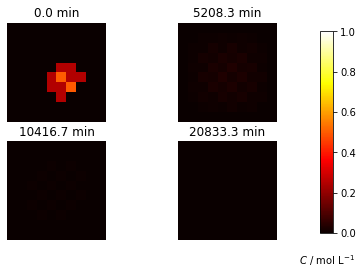

0.00013006767617662 0.00030535061246147056


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# puddle size in m
# width
w = 0.1
#height
h = 0.1

# length of spatial intervals in x-, y- directions in m
dx = dy = 0.01
# number of spatial intervals in each direction
nx, ny = int(w/dx), int(h/dy)

# Diffusion coefficient for the contaminant, m2.s-1
D = 2e-9

# Initial concentration of the contaminant in mol L-1
C_init = 1

# Define an initial matrix in which there is no contamination, and a copy of that matrix
c0 = np.zeros((nx, ny))
c = c0.copy()

# Initial conditions occur within a circle of radius r centred at (cx,cy) (in m)
r, cx, cy = 0.01, 0.05, 0.05
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            c0[i,j] = C_init

# Define shorthand variables for dx*dx and dy*dy
dx2, dy2 = dx*dx, dy*dy

# Define the scaling of dt using the scaling of dx, dy and D; based on the convection-diffusion equation in the infinitessimal limit.
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

# Number of timesteps for the simulation
nsteps = 101

# Do the calculation with forward-difference in time, central-difference in space

# Notes on syntax for vectors here:
# vec[a:b] means the elements from a to b of the vector vec
# vec[:] means all the elements
# vec[a:] means from element a to the final element
# vec[a:-1] means from element a to the end of the vector, except the last element
# So here c[1:-1, 1:-1] means from the second element (the first one has index zero) to the second to last element for both x and y
# We don't include all the elements because those on the edge cannot use the central-difference formulation (there is no element next to them)
# This is equivalent to having a boundary condition of zero concentration along the edge

def do_timestep(c0, c):
    c[1:-1, 1:-1] = c0[1:-1, 1:-1] + D * dt * (
          (c0[2:, 1:-1] - 2*c0[1:-1, 1:-1] + c0[:-2, 1:-1])/dx2
          + (c0[1:-1, 2:] - 2*c0[1:-1, 1:-1] + c0[1:-1, :-2])/dy2 )

    c0 = c.copy()
    return c0, c

  # Output 4 figures at these timesteps
mfig = [0, 25, 50, 100]

# This variable counts the figures generates
fignum = 0

# This creates a figure
fig = plt.figure()

# This uses the function defined in block 2 to calculate through the timesteps
for m in range(nsteps):
    c0, c = do_timestep(c0, c)

    # This code creates and formats a figure if the step number is one of those specified above
    if m in mfig:
        fignum += 1
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(c.copy(), cmap=plt.get_cmap('hot'), vmin=0,vmax=C_init)
        ax.set_axis_off()
        ax.set_title('{:.1f} min'.format(m*dt/60))

# This code formats and shows the subfigures together
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$C$ / mol L$^{-1}$', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

# Print calculated values at the requested points
print(c[int(nx/4),int(ny/4)], c[int(nx/2),int(ny/2)])

Put the centre of the circle at an arbitrary point, $(x,y)=(2.5,3.0)$ cm

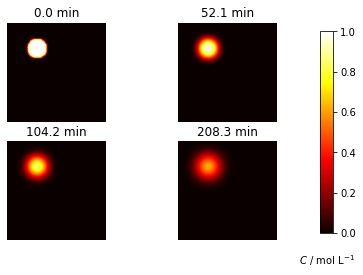

0.5395563901967171 0.00045107937407387193


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# puddle size in m
# width
w = 0.1
#height
h = 0.1

# length of spatial intervals in x-, y- directions in m
dx = dy = 0.001
# number of spatial intervals in each direction
nx, ny = int(w/dx), int(h/dy)

# Diffusion coefficient for the contaminant, m2.s-1
D = 2e-9

# Initial concentration of the contaminant in mol L-1
C_init = 1

# Define an initial matrix in which there is no contamination, and a copy of that matrix
c0 = np.zeros((nx, ny))
c = c0.copy()

# Initial conditions occur within a circle of radius r centred at (cx,cy) (in m)
r, cx, cy = 0.01, 0.025, 0.03
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            c0[i,j] = C_init

# Define shorthand variables for dx*dx and dy*dy
dx2, dy2 = dx*dx, dy*dy

# Define the scaling of dt using the scaling of dx, dy and D; based on the convection-diffusion equation in the infinitessimal limit.
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

# Number of timesteps for the simulation
nsteps = 101

# Do the calculation with forward-difference in time, central-difference in space

# Notes on syntax for vectors here:
# vec[a:b] means the elements from a to b of the vector vec
# vec[:] means all the elements
# vec[a:] means from element a to the final element
# vec[a:-1] means from element a to the end of the vector, except the last element
# So here c[1:-1, 1:-1] means from the second element (the first one has index zero) to the second to last element for both x and y
# We don't include all the elements because those on the edge cannot use the central-difference formulation (there is no element next to them)
# This is equivalent to having a boundary condition of zero concentration along the edge

def do_timestep(c0, c):
    c[1:-1, 1:-1] = c0[1:-1, 1:-1] + D * dt * (
          (c0[2:, 1:-1] - 2*c0[1:-1, 1:-1] + c0[:-2, 1:-1])/dx2
          + (c0[1:-1, 2:] - 2*c0[1:-1, 1:-1] + c0[1:-1, :-2])/dy2 )

    c0 = c.copy()
    return c0, c

  # Output 4 figures at these timesteps
mfig = [0, 25, 50, 100]

# This variable counts the figures generates
fignum = 0

# This creates a figure
fig = plt.figure()

# This uses the function defined in block 2 to calculate through the timesteps
for m in range(nsteps):
    c0, c = do_timestep(c0, c)

    # This code creates and formats a figure if the step number is one of those specified above
    if m in mfig:
        fignum += 1
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(c.copy(), cmap=plt.get_cmap('hot'), vmin=0,vmax=C_init)
        ax.set_axis_off()
        ax.set_title('{:.1f} min'.format(m*dt/60))

# This code formats and shows the subfigures together
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$C$ / mol L$^{-1}$', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

# Print calculated values at the requested points
print(c[int(nx/4),int(ny/4)], c[int(nx/2),int(ny/2)])

Bonus question - a square initial area of contamination.

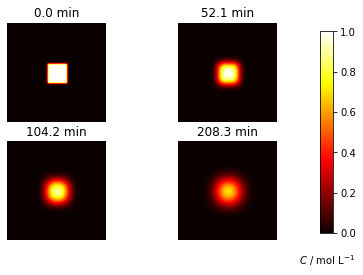

0.00018676088210417376 0.704769511460573


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# puddle size in m
# width
w = 0.1
#height
h = 0.1

# length of spatial intervals in x-, y- directions in m
dx = dy = 0.001
# number of spatial intervals in each direction
nx, ny = int(w/dx), int(h/dy)

# Diffusion coefficient for the contaminant, m2.s-1
D = 2e-9

# Initial concentration of the contaminant in mol L-1
C_init = 1

# Define an initial matrix in which there is no contamination, and a copy of that matrix
c0 = np.zeros((nx, ny))
c = c0.copy()

# Initial conditions occur within a square of side length sq_side centred at (cx,cy) (in m)
sq_side, cx, cy = 0.02, 0.05, 0.05
r2 = r**2
for i in range(nx):
    for j in range(ny):
        if abs(i*dx-cx) < sq_side/2 and abs(j*dy-cy) < sq_side/2:
            c0[i,j] = C_init

# Define shorthand variables for dx*dx and dy*dy
dx2, dy2 = dx*dx, dy*dy

# Define the scaling of dt using the scaling of dx, dy and D; based on the convection-diffusion equation in the infinitessimal limit.
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

# Number of timesteps for the simulation
nsteps = 101

# Do the calculation with forward-difference in time, central-difference in space

# Notes on syntax for vectors here:
# vec[a:b] means the elements from a to b of the vector vec
# vec[:] means all the elements
# vec[a:] means from element a to the final element
# vec[a:-1] means from element a to the end of the vector, except the last element
# So here c[1:-1, 1:-1] means from the second element (the first one has index zero) to the second to last element for both x and y
# We don't include all the elements because those on the edge cannot use the central-difference formulation (there is no element next to them)
# This is equivalent to having a boundary condition of zero concentration along the edge

def do_timestep(c0, c):
    c[1:-1, 1:-1] = c0[1:-1, 1:-1] + D * dt * (
          (c0[2:, 1:-1] - 2*c0[1:-1, 1:-1] + c0[:-2, 1:-1])/dx2
          + (c0[1:-1, 2:] - 2*c0[1:-1, 1:-1] + c0[1:-1, :-2])/dy2 )

    c0 = c.copy()
    return c0, c

  # Output 4 figures at these timesteps
mfig = [0, 25, 50, 100]

# This variable counts the figures generates
fignum = 0

# This creates a figure
fig = plt.figure()

# This uses the function defined in block 2 to calculate through the timesteps
for m in range(nsteps):
    c0, c = do_timestep(c0, c)

    # This code creates and formats a figure if the step number is one of those specified above
    if m in mfig:
        fignum += 1
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(c.copy(), cmap=plt.get_cmap('hot'), vmin=0,vmax=C_init)
        ax.set_axis_off()
        ax.set_title('{:.1f} min'.format(m*dt/60))

# This code formats and shows the subfigures together
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$C$ / mol L$^{-1}$', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

# Print calculated values at the requested points
print(c[int(nx/4),int(ny/4)], c[int(nx/2),int(ny/2)])


*Contact: Geoff Willmott (g.willmott@auckland@auckland.ac.nz)*